In [1]:
import seaborn as sns
sns.set_style('dark') 
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


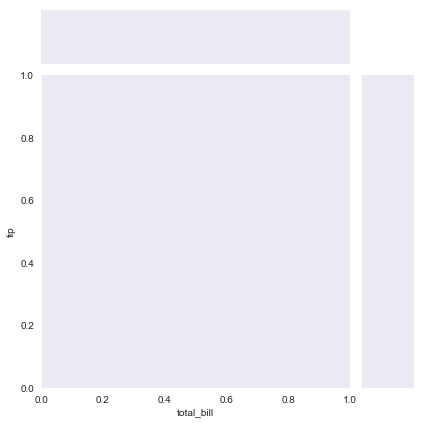

In [2]:
# Initialize the figure but don’t draw any plots onto it:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

Figure(432x432)

total_bill
xlim (-8.618194923359608, 62.49819492335961)
ylim (-1.1588976422865866, 11.815333765963588)
[-10.   0.  10.  20.  30.  40.  50.  60.  70.]
<a list of 9 Text xticklabel objects>


xlim (-8.618194923359608, 62.49819492335961)
ylim (0.0, 0.06057401086486226)
[-10.   0.  10.  20.  30.  40.  50.  60.  70.]
<a list of 9 Text xticklabel objects>


xlim (0.0, 0.45614754098360655)
ylim (-1.1588976422865866, 11.815333765963588)
[0.   0.25 0.5 ]
<a list of 3 Text xticklabel objects>


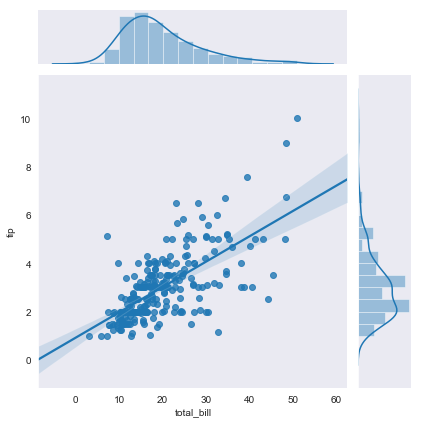

In [3]:
# Add plots using default parameters:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)
print(g.fig)
for i in g.fig.get_axes():
    print(i.get_title())
    print(i.get_xlabel())
    print('xlim', i.get_xlim())
    print('ylim', i.get_ylim())
    print(i.get_xticks())
    print(i.get_xticklabels())

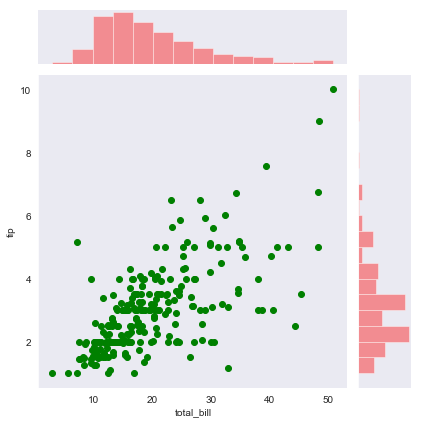

In [4]:
# Draw the join and marginal plots separately, which allows finer-level control other parameters:
import matplotlib.pyplot as plt
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot_joint(plt.scatter, color="g")
g = g.plot_marginals(sns.distplot, kde=False, color="r")

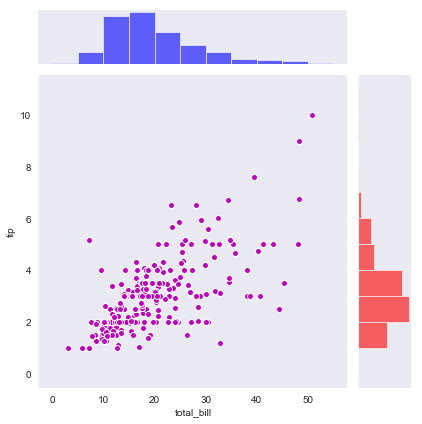

In [5]:
# Draw the two marginal plots separately:
import numpy as np
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot_joint(plt.scatter, color="m", edgecolor="white")
_ = g.ax_marg_x.hist(tips["total_bill"], color="b", alpha=.6,
                      bins=np.arange(0, 60, 5))
_ = g.ax_marg_y.hist(tips["tip"], color="r", alpha=.6,
                     orientation="horizontal",
                      bins=np.arange(0, 12, 1))

C:\Users\duanm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


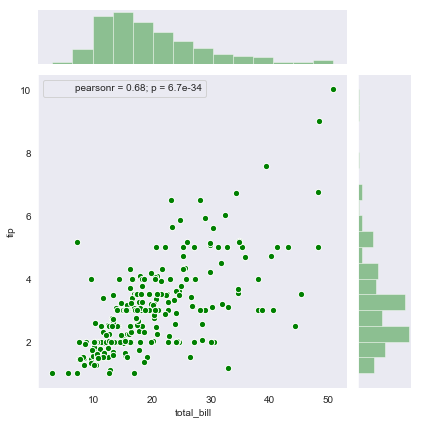

In [6]:
# Add an annotation with a statistic summarizing the bivariate relationship:
from scipy import stats

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot_joint(plt.scatter, color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
g = g.annotate(stats.pearsonr)

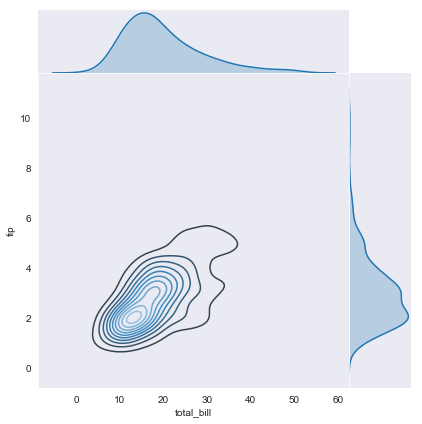

In [7]:
# Remove the space between the joint and marginal axes:
g = sns.JointGrid(x="total_bill", y="tip", data=tips, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

C:\Users\duanm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


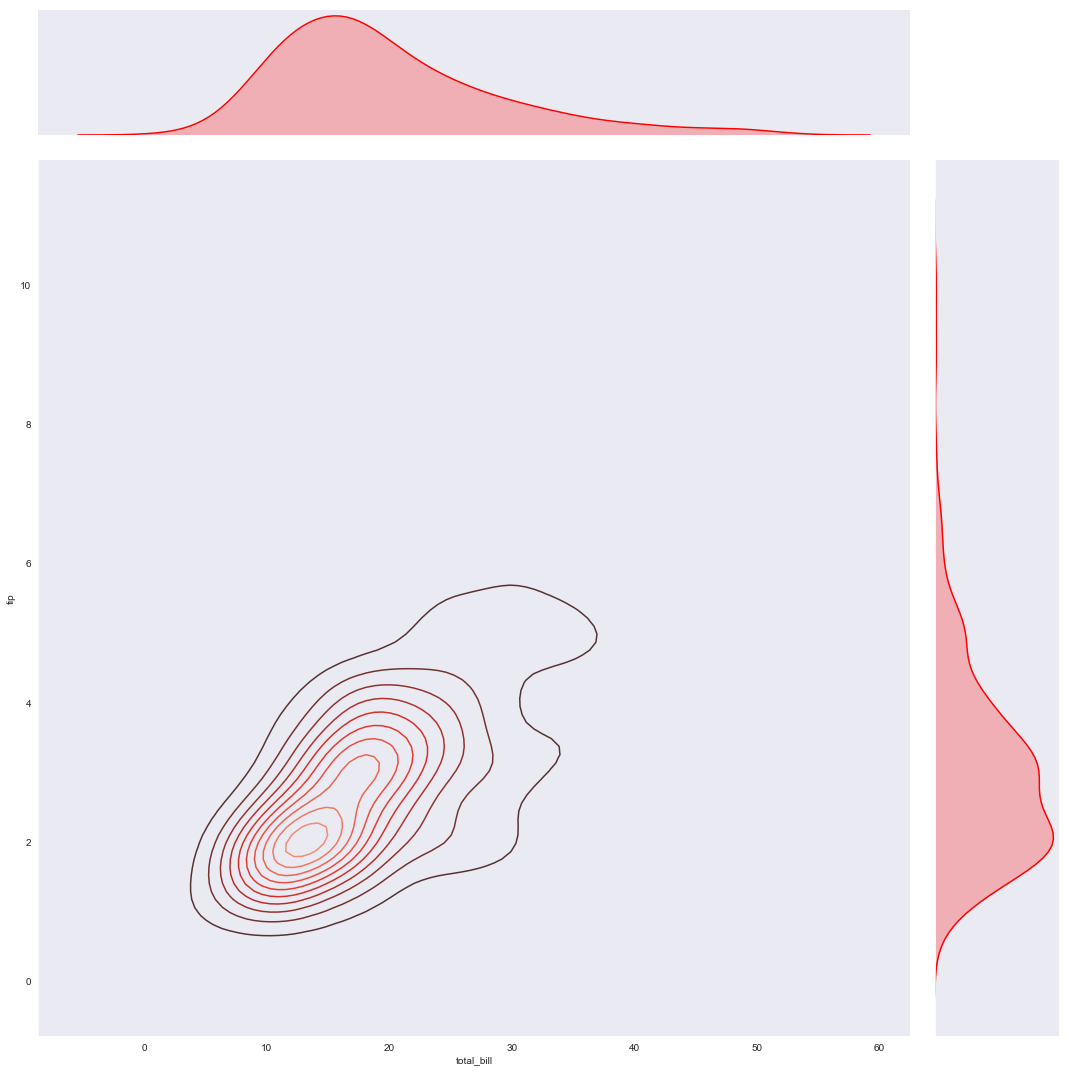

In [8]:
# Draw a smaller plot with relatively larger marginal axes:
g = sns.JointGrid(x="total_bill", y="tip", data=tips,
                    size=15, ratio=6)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

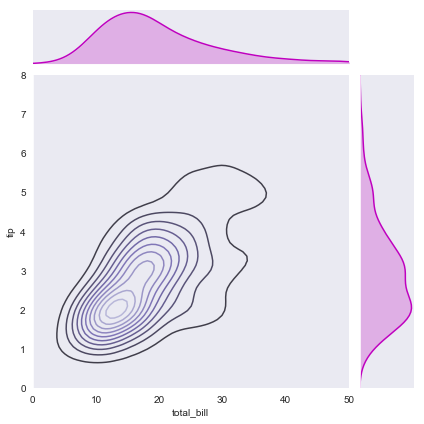

In [9]:
# Set limits on the axes:
g = sns.JointGrid(x="total_bill", y="tip", data=tips,
                   xlim=(0, 50), ylim=(0, 8))
g = g.plot_joint(sns.kdeplot, cmap="Purples_d")
g = g.plot_marginals(sns.kdeplot, color="m", shade=True)